### 60. 単語ベクトルの読み込みと表示

In [1]:
from gensim.models import KeyedVectors

unable to import 'smart_open.gcs', disabling that module


In [2]:
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

### 61. 単語の類似度

In [4]:
model.similarity("United_States", "U.S.")

0.73107743

### 62. 類似度の高い単語10件

In [5]:
import numpy as np
import pandas as pd

In [6]:
simularities = model.most_similar("United_States")
pd.DataFrame(
    simularities,
    columns = ['単語', '類似度'],
    index = np.arange(len(simularities)) + 1
)

,単語,類似度
1,Unites_States,0.787725
2,Untied_States,0.754137
3,United_Sates,0.740072
4,U.S.,0.731077
5,theUnited_States,0.640439
6,America,0.617841
7,UnitedStates,0.616731
8,Europe,0.613299
9,countries,0.604480
10,Canada,0.601907


### 63. 加法構成性によるアナロジー

In [7]:
simularities = model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])
pd.DataFrame(
    simularities,
    columns = ['単語', '類似度'],
    index = np.arange(len(simularities)) + 1
)

,単語,類似度
1,Greece,0.689848
2,Aristeidis_Grigoriadis,0.560685
3,Ioannis_Drymonakos,0.555291
4,Greeks,0.545069
5,Ioannis_Christou,0.540086
6,Hrysopiyi_Devetzi,0.524844
7,Heraklio,0.520776
8,Athens_Greece,0.516881
9,Lithuania,0.516687
10,Iraklion,0.514679


### 64. アナロジーデータでの実験

In [43]:
with open('data/questions-words.txt') as f:
    lines = f.read().splitlines()

dataset = []
category = None
for line in lines:
    if line.startswith(':'):
        category = line[2:]
    else:
        lst = [category] + line.split(' ')
        dataset.append(lst)

In [44]:
pd.DataFrame(dataset[:10])

,0,1,2,3,4
0,capital-common-countries,Athens,Greece,Baghdad,Iraq
1,capital-common-countries,Athens,Greece,Bangkok,Thailand
2,capital-common-countries,Athens,Greece,Beijing,China
3,capital-common-countries,Athens,Greece,Berlin,Germany
4,capital-common-countries,Athens,Greece,Bern,Switzerland
5,capital-common-countries,Athens,Greece,Cairo,Egypt
6,capital-common-countries,Athens,Greece,Canberra,Australia
7,capital-common-countries,Athens,Greece,Hanoi,Vietnam
8,capital-common-countries,Athens,Greece,Havana,Cuba
9,capital-common-countries,Athens,Greece,Helsinki,Finland


In [45]:
from tqdm import tqdm

In [46]:
for i, lst in enumerate(tqdm(dataset)):
    pred, prob = model.most_similar(positive = lst[2:4], negative = lst[1:2], topn = 1)[0]
    dataset[i].append(pred)

100%|██████████| 19544/19544 [30:11<00:00, 10.79it/s]


In [47]:
pd.DataFrame(dataset[:10])

,0,1,2,3,4,5
0,capital-common-countries,Athens,Greece,Baghdad,Iraq,Iraqi
1,capital-common-countries,Athens,Greece,Bangkok,Thailand,Thailand
2,capital-common-countries,Athens,Greece,Beijing,China,China
3,capital-common-countries,Athens,Greece,Berlin,Germany,Germany
4,capital-common-countries,Athens,Greece,Bern,Switzerland,Switzerland
5,capital-common-countries,Athens,Greece,Cairo,Egypt,Egypt
6,capital-common-countries,Athens,Greece,Canberra,Australia,Australia
7,capital-common-countries,Athens,Greece,Hanoi,Vietnam,Viet_Nam
8,capital-common-countries,Athens,Greece,Havana,Cuba,Cuba
9,capital-common-countries,Athens,Greece,Helsinki,Finland,Finland


### 65. アナロジータスクでの正解率

evaluate_word_analogies()使えばいいっていう説は広く知られている

In [48]:
semantic_analogy = [lst[-2:] for lst in dataset if not lst[0].startswith('gram')]
syntactic_analogy = [lst[-2:] for lst in dataset if lst[0].startswith('gram')]

In [49]:
acc = np.mean([true == pred for true, pred in semantic_analogy])
print('意味的アナロジー　正解率:', acc)

意味的アナロジー　正解率: 0.7308602999210734


In [50]:
acc = np.mean([true == pred for true, pred in syntactic_analogy])
print('文法的アナロジー　正解率:', acc)

文法的アナロジー　正解率: 0.7400468384074942


### 66. WordSimilarity-353での評価

In [51]:
import zipfile

In [52]:
# zipファイルから読み込む
with zipfile.ZipFile('data/wordsim353.zip') as f:
    with f.open('combined.csv') as g:
        data = g.read()

# バイト列をデコード
data = data.decode('UTF-8').splitlines()
data = data[1:]

# タブ区切り
data = [line.split(',') for line in data]
len(data)

353

In [53]:
for i, lst in enumerate(data):
    sim = model.similarity(lst[0], lst[1])
    data[i].append(sim)

In [54]:
pd.DataFrame(
    data[:10],
    columns = ['単語1', '単語2', '人間', 'ベクトル']
)

,単語1,単語2,人間,ベクトル
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000
3,book,paper,7.46,0.363463
4,computer,keyboard,7.62,0.396392
5,computer,internet,7.58,0.406862
6,plane,car,5.77,0.377970
7,train,car,6.31,0.340256
8,telephone,communication,7.50,0.332185
9,television,radio,6.77,0.611497


In [55]:
from scipy.stats import spearmanr

順位を取り出すにはargsortを2回適用するというのもあるけど，計算量的には無駄かもしれない

In [56]:
def rank(x):
    args = np.argsort(-np.array(x))
    rank = np.empty_like(args)
    rank[args] = np.arange(len(x))
    return rank

In [57]:
human = [float(lst[2]) for lst in data]
w2v = [lst[3] for lst in data]
human_rank = rank(human)
w2v_rank = rank(w2v)
rho, p_value = spearmanr(human_rank, w2v_rank)

In [58]:
print('順位相関係数 :', rho)
print('p値 :', p_value)

順位相関係数 : 0.700313895424209
p値 : 2.4846350292113526e-53


せっかくなのでプロットして見てみる

In [59]:
import matplotlib.pyplot as plt

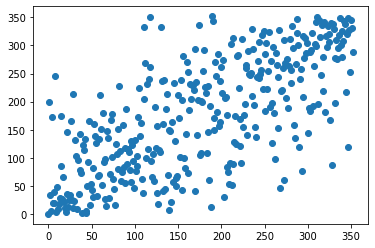

In [60]:
plt.scatter(human_rank, w2v_rank)
plt.savefig('result/66_2.png')

### 67. k-meansクラスタリング

国名をどこからとってくるのがいいのかよくわからないが，アナロジーのデータセットでいいやってなる

In [61]:
countries = {
    country
    for lst in dataset
    for country in [lst[2], lst[4]]
    if lst[0] in {'capital-common-countries', 'capital-world'}
} | {
    country
    for lst in dataset
    for country in [lst[1], lst[3]]
    if lst[0] in {'currency', 'gram6-nationality-adjective'}
}
countries = list(countries)
len(countries)

129

In [62]:
country_vectors = [model[country] for country in countries]

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(country_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('クラス', i)
    print(', '.join([countries[k] for k in cluster]))

クラス 0
Suriname, Honduras, Tuvalu, Guyana, Venezuela, Peru, Cuba, Ecuador, Nicaragua, Dominica, Colombia, Belize, Mexico, Bahamas, Jamaica, Chile
クラス 1
Netherlands, Egypt, France, Syria, Finland, Germany, Uruguay, Switzerland, Greenland, Italy, Lebanon, Malta, Algeria, Europe, Tunisia, Brazil, Ireland, England, Libya, Spain, Argentina, Liechtenstein, Iran, Jordan, USA, Iceland, Sweden, Norway, Qatar, Portugal, Denmark, Canada, Israel, Belgium, Morocco, Austria
クラス 2
Kazakhstan, Lithuania, Turkmenistan, Serbia, Croatia, Greece, Uzbekistan, Armenia, Latvia, Albania, Slovenia, Cyprus, Ukraine, Georgia, Belarus, Bulgaria, Kyrgyzstan, Macedonia, Estonia, Montenegro, Turkey, Azerbaijan, Tajikistan, Poland, Russia, Romania, Hungary, Slovakia, Moldova
クラス 3
Ghana, Senegal, Zambia, Sudan, Somalia, Zimbabwe, Gabon, Madagascar, Angola, Liberia, Gambia, Niger, Uganda, Mauritania, Namibia, Eritrea, Botswana, Malawi, Mozambique, Guinea, Kenya, Nigeria, Burundi, Mali, Rwanda
クラス 4
Japan, China, Pakist

大体，アジア，ヨーロッパ，旧ソ連，アメリカ，アフリカ　という感じ

### 68. Ward法によるクラスタリング

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage

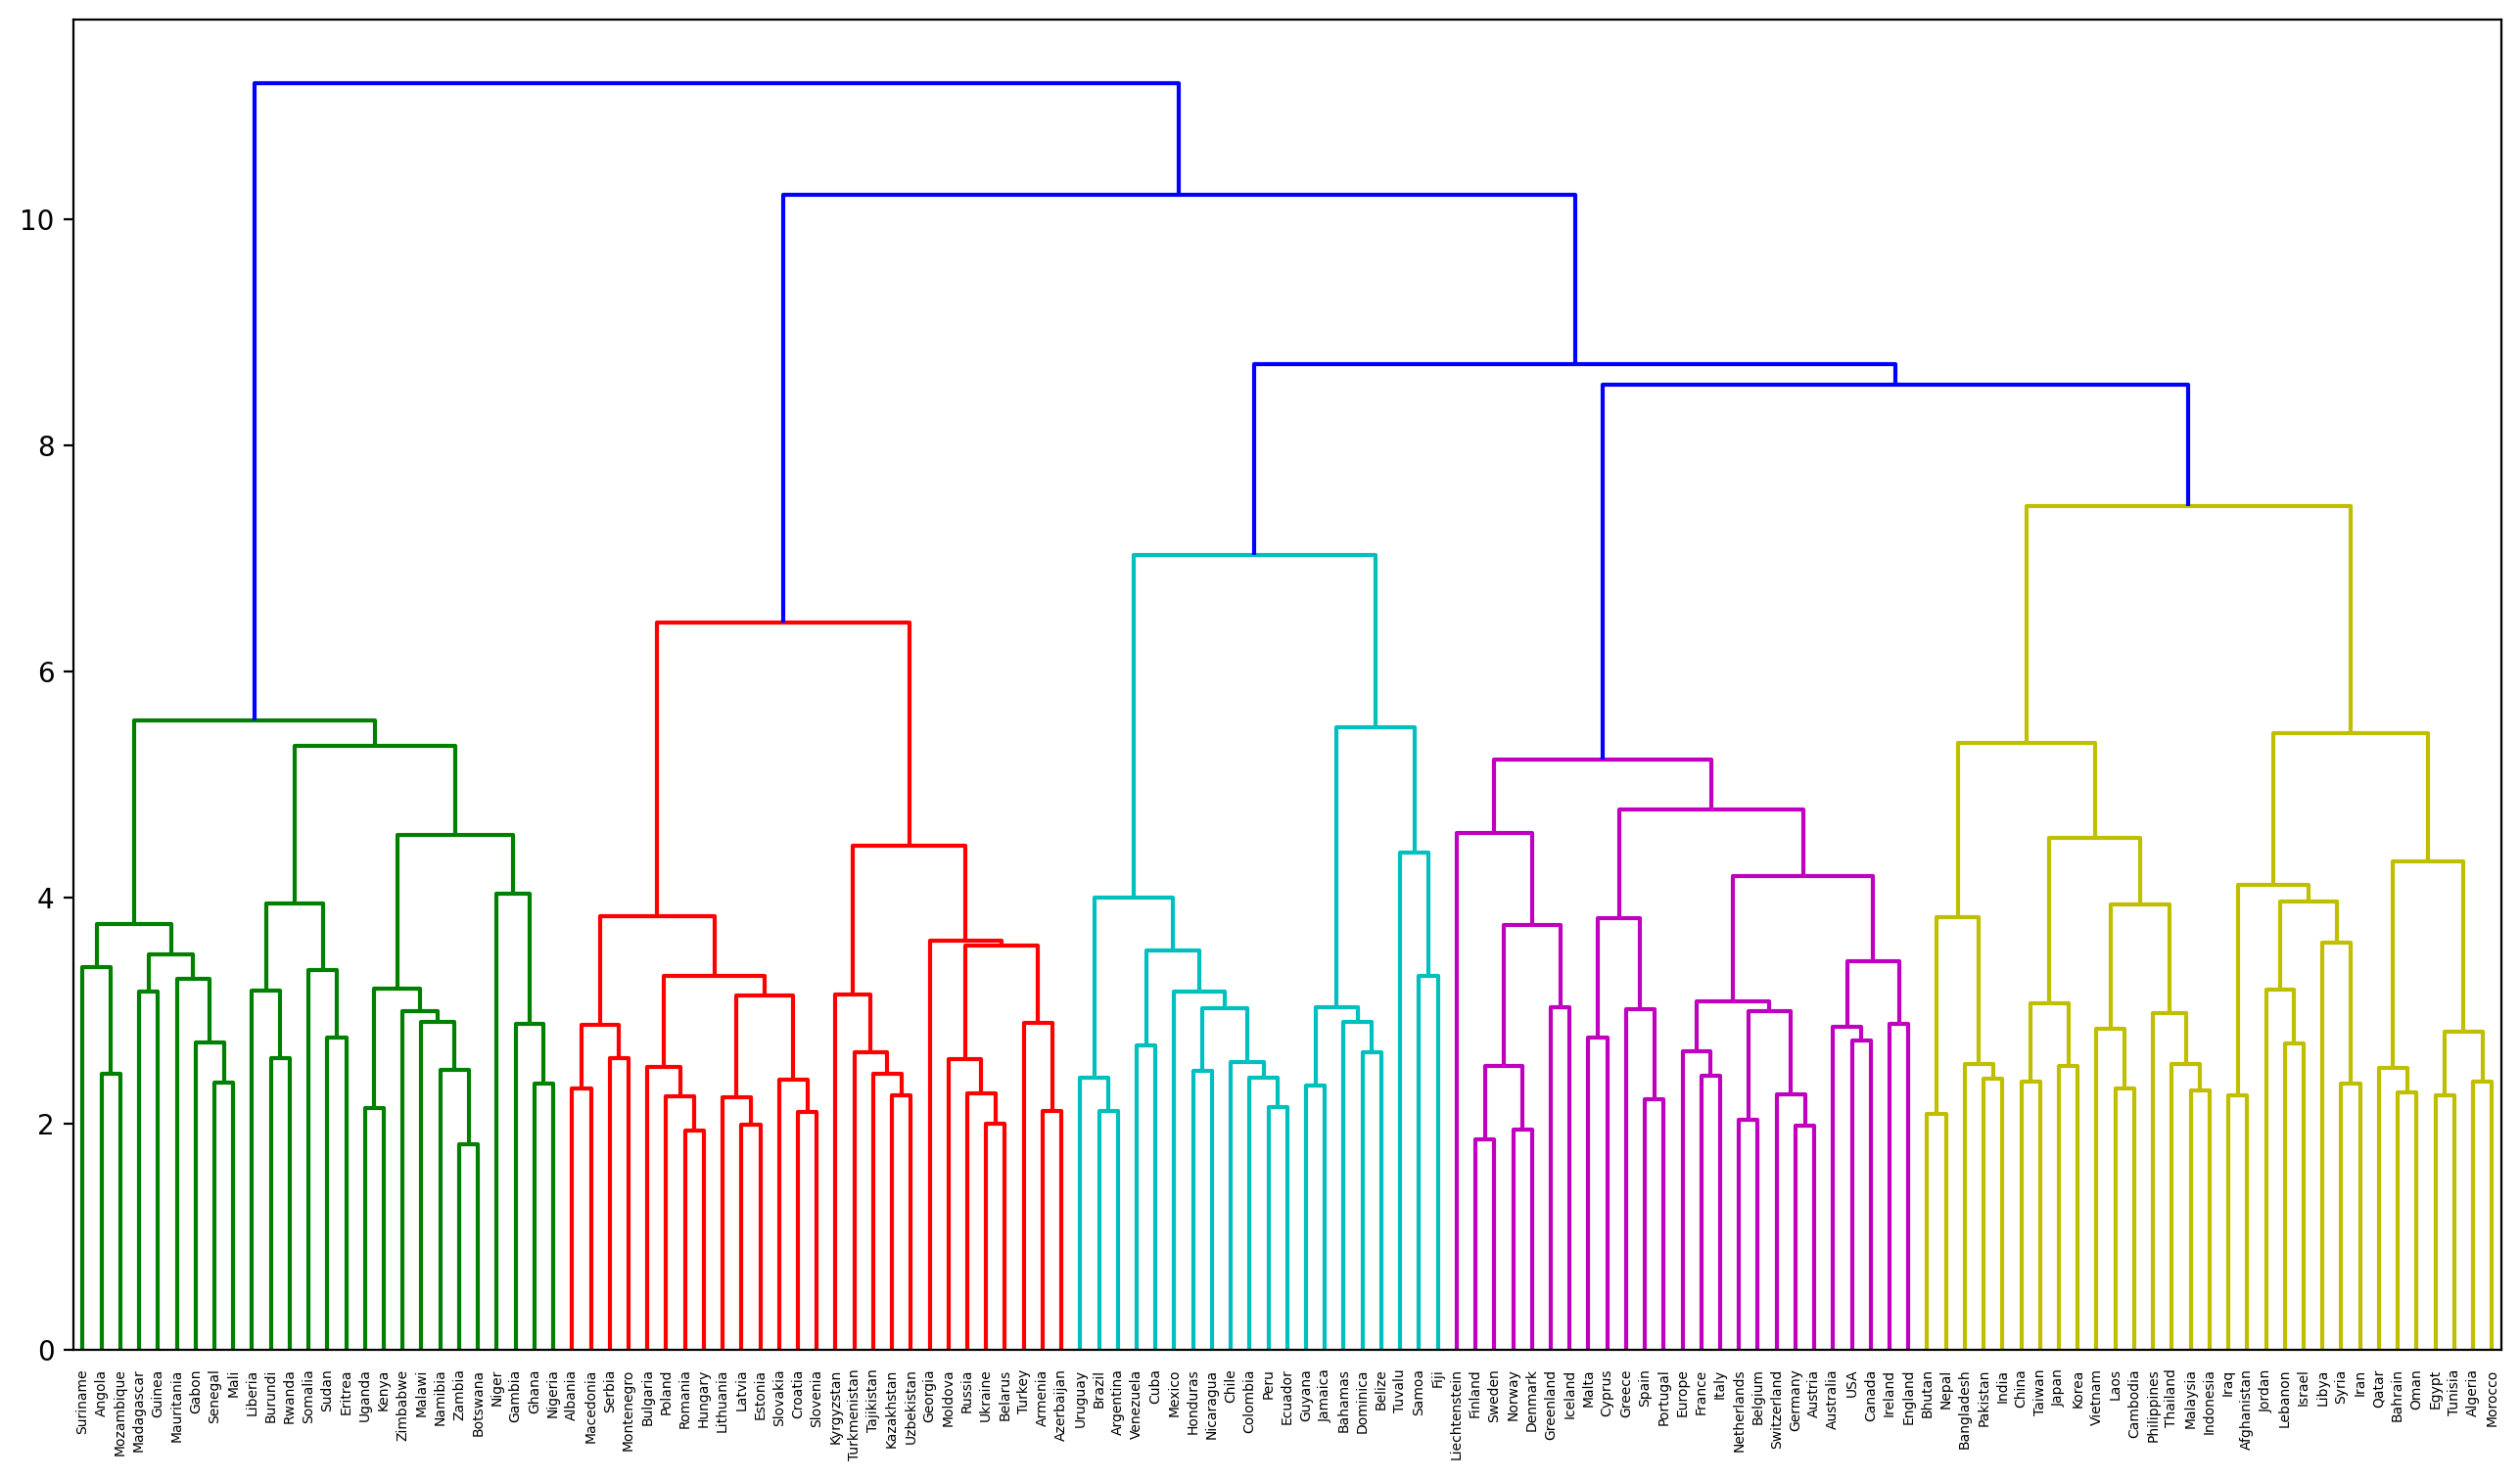

In [67]:
plt.figure(figsize=(16, 9), dpi=200)
Z = linkage(country_vectors, method='ward')
dendrogram(Z, labels = countries)
plt.savefig('result/68.png')

### 69. t-SNEによる可視化

In [68]:
from sklearn.manifold import TSNE

In [69]:
tsne = TSNE()
tsne.fit(country_vectors)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

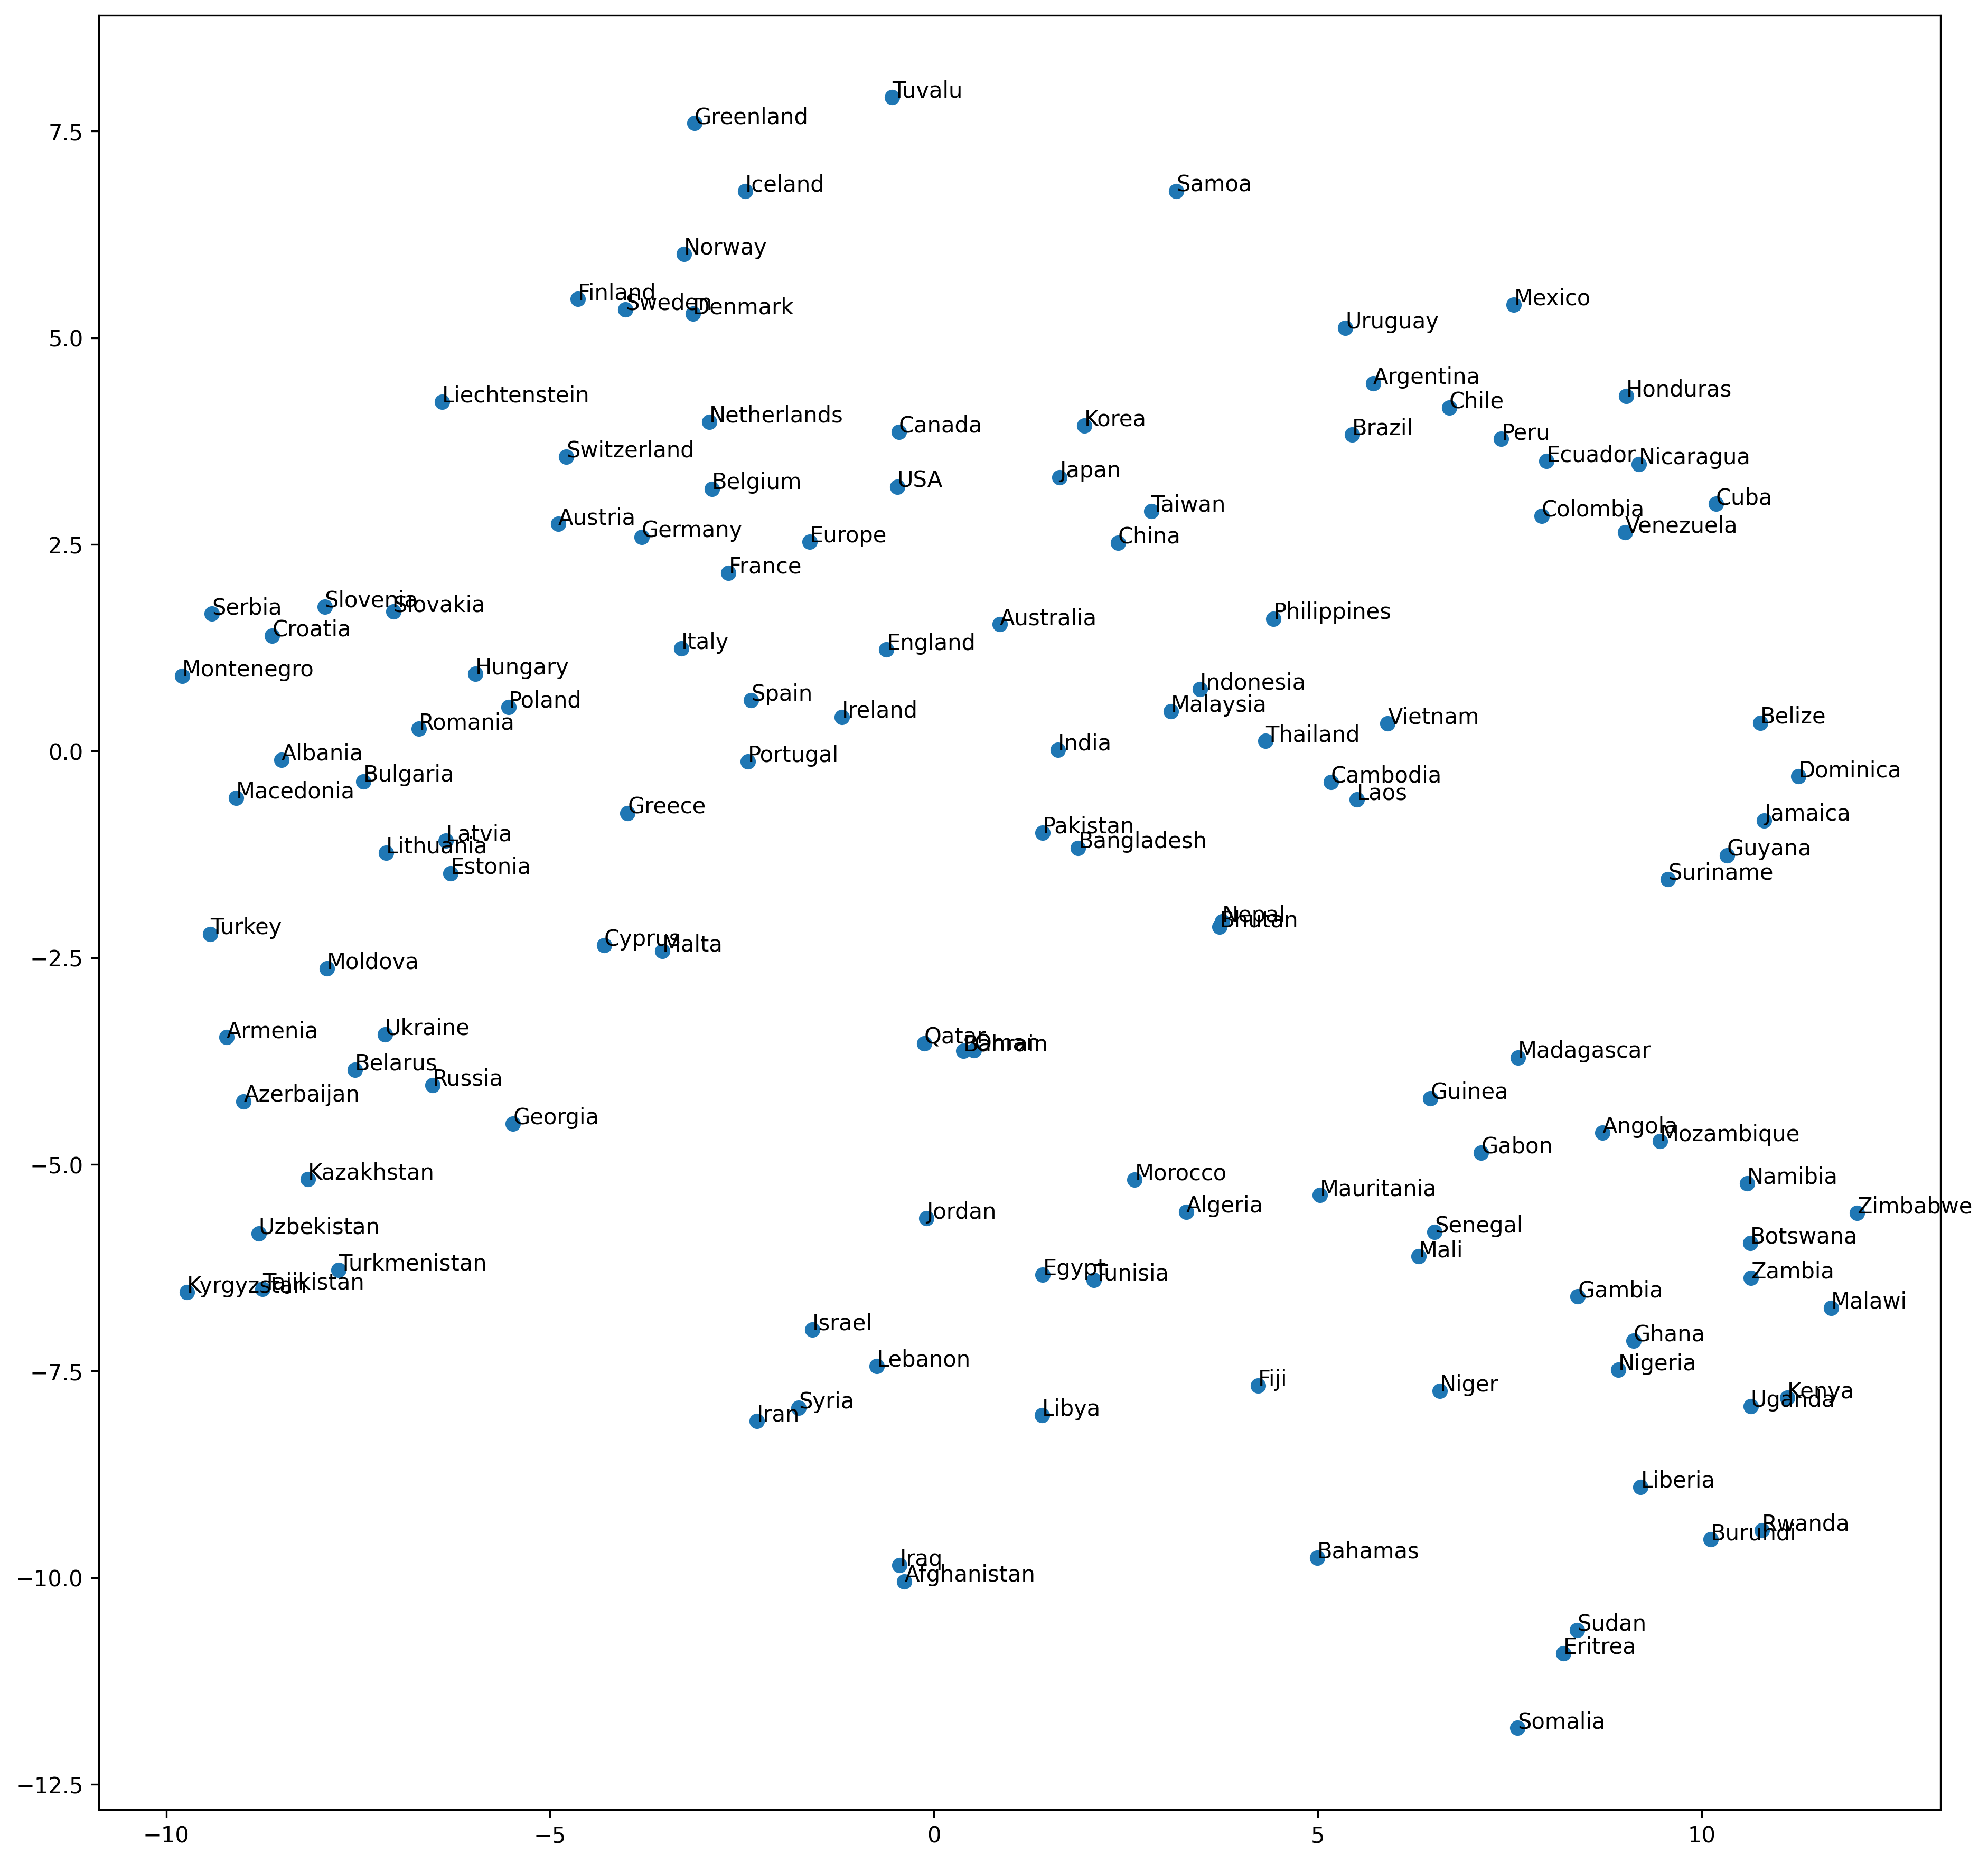

In [70]:
plt.figure(figsize=(15, 15), dpi=300)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
for (x, y), name in zip(tsne.embedding_, countries):
    plt.annotate(name, (x, y))
plt.savefig('result/69.png')